In [ ]:
!pip install gradio transformers torch pandas



In [ ]:

# STEP 1: MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ml-project


[Errno 2] No such file or directory: '/content/drive/MyDrive/ml-project'
/content


In [ ]:

# STEP 2: IMPORT LIBRARIES

import os
import pandas as pd

# STEP 3: DEFINE PATHS

base_path = "/content/drive/MyDrive/BBC News Summary"

articles_path = os.path.join(base_path, "News Articles")
summaries_path = os.path.join(base_path, "Summaries")

# STEP 4: READ DATA

categories = os.listdir(articles_path)  # ['business', 'entertainment', 'politics', 'sport', 'tech']
data = []

for cat in categories:
    art_folder = os.path.join(articles_path, cat)
    sum_folder = os.path.join(summaries_path, cat)

    for fname in os.listdir(art_folder):
        if fname.endswith(".txt"):
            art_file = os.path.join(art_folder, fname)
            sum_file = os.path.join(sum_folder, fname)

            with open(art_file, "r", encoding="latin-1") as f:
                article = f.read().strip()
            with open(sum_file, "r", encoding="latin-1") as f:
                summary = f.read().strip()

            data.append({
                "category": cat,
                "filename": fname,
                "article": article,
                "summary": summary
            })

# STEP 5: CREATE DATAFRAME

df = pd.DataFrame(data)
print("Dataset shape:", df.shape)
df.head(3)


Dataset shape: (2225, 4)


,category,filename,article,summary
0,entertainment,040.txt,"Wine comedy up for six film gongs\n\nSideways,...","Sideways, a wine-tasting comedy starring Paul ..."
1,entertainment,014.txt,Adventure tale tops awards\n\nYoung book fans ...,Paul Stewart and Chris Riddell's book came top...
2,entertainment,013.txt,Levy takes Whitbread novel prize\n\nOrange Pri...,Orange Prize winner Andrea Levy has seen her b...


In [ ]:

# STEP 5: DOWNLOAD NLTK RESOURCES
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

# STEP 6: IMPORTS & INITIAL SETUP

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import os
import pandas as pd

# STEP 7: DEFINE CLEANING FUNCTIONS

stop_words = set(stopwords.words("english"))
stop_words.difference_update({"not", "no", "nor"})  # keep negations
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Aggressive cleaning for analysis (deep clean)."""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)  # keep only letters
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

def light_clean_text(text):
    """Mild cleaning for summarization (retain readability)."""
    text = re.sub(r"\s+", " ", str(text))
    text = re.sub(r"\s([?.!,;:])", r"\1", text)
    return text.strip()

# STEP 8: APPLY CLEANING (ONLY ARTICLES)
print("🧹 Cleaning articles (summaries remain untouched)... please wait ⏳")

df["clean_article"] = df["article"].apply(clean_text)          # deep clean
df["summary_ready"] = df["article"].apply(light_clean_text)    # mild clean

print("✅ Article cleaning complete!")

# STEP 9: SAVE CLEANED DATASETS TO DRIVE

base_path = "/content/drive/MyDrive/BBC News Summary"

processed_path = os.path.join(base_path, "cleaned_dataset.csv")
df.to_csv(processed_path, index=False)
print(f"✅ Deep-cleaned dataset saved to: {processed_path}")

summary_ready_path = os.path.join(base_path, "news_for_summarization.csv")
df[["summary_ready", "category", "summary"]].to_csv(summary_ready_path, index=False)
print(f"✅ Light-cleaned version saved for summarization: {summary_ready_path}")

# STEP 10: QUICK CHECK

i = 0
print("\n=== SAMPLE COMPARISON ===")
print("Original Article:\n", df.loc[i, "article"][:300], "\n")
print("Deep Cleaned Article:\n", df.loc[i, "clean_article"][:300], "\n")
print("Light Cleaned (for Summarizer):\n", df.loc[i, "summary_ready"][:300], "\n")
print("Reference Summary (Untouched):\n", df.loc[i, "summary"][:300])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


🧹 Cleaning articles (summaries remain untouched)... please wait ⏳
✅ Article cleaning complete!
✅ Deep-cleaned dataset saved to: /content/drive/MyDrive/BBC News Summary/cleaned_dataset.csv
✅ Light-cleaned version saved for summarization: /content/drive/MyDrive/BBC News Summary/news_for_summarization.csv

=== SAMPLE COMPARISON ===
Original Article:
 Wine comedy up for six film gongs

Sideways, a wine-tasting comedy starring Paul Giamatti, is up for six Independent Spirit Awards, the art-house version of the Oscars.

The awards are held on 26 February, the day before the Oscars. Spanish drama Maria Full of Grace, about a Colombian woman who beco 

Deep Cleaned Article:
 wine comedy six film gong sideways wine tasting comedy starring paul giamatti six independent spirit award art house version oscar award held february day oscar spanish drama maria full grace colombian woman becomes drug courier got five nomination controversial biopic kinsey starring liam neeson se 

Light Cleaned (for Su

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

Loaded cleaned dataset: (2225, 6)
Predicting refined emotions for each article... ⏳ (This may take a few minutes)


  0%|          | 0/2225 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

100%|██████████| 2225/2225 [10:54<00:00,  3.40it/s]


✅ Emotion prediction (improved) complete!
✅ Refined results saved to: /content/drive/MyDrive/BBC News Summary/news_with_emotions_refined.csv


/tmp/ipython-input-2488220514.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


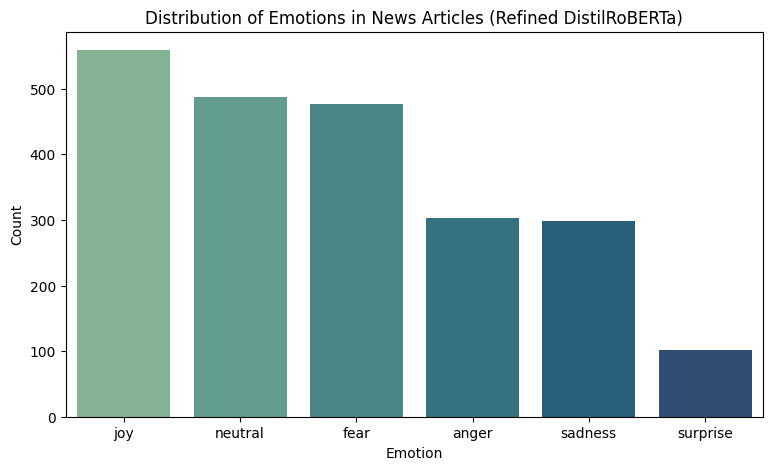


=== Sample Output ===


,category,filename,article,summary,clean_article,summary_ready,emotion
0,entertainment,040.txt,"Wine comedy up for six film gongs\n\nSideways,...","Sideways, a wine-tasting comedy starring Paul ...",wine comedy six film gong sideways wine tastin...,"Wine comedy up for six film gongs Sideways, a ...",anger
1,entertainment,014.txt,Adventure tale tops awards\n\nYoung book fans ...,Paul Stewart and Chris Riddell's book came top...,adventure tale top award young book fan voted ...,Adventure tale tops awards Young book fans hav...,joy
2,entertainment,013.txt,Levy takes Whitbread novel prize\n\nOrange Pri...,Orange Prize winner Andrea Levy has seen her b...,levy take whitbread novel prize orange prize w...,Levy takes Whitbread novel prize Orange Prize ...,joy
3,entertainment,012.txt,Neeson in bid to revive theatre\n\nHollywood f...,The Ballymena-born actor said that the theatre...,neeson bid revive theatre hollywood film star ...,Neeson in bid to revive theatre Hollywood film...,fear
4,entertainment,005.txt,Poppins musical gets flying start\n\nThe stage...,Mary Poppins was originally created by author ...,poppins musical get flying start stage adaptat...,Poppins musical gets flying start The stage ad...,neutral



Emotion Counts:
emotion
joy         559
neutral     487
fear        477
anger       303
sadness     298
surprise    101
Name: count, dtype: int64

Sample Articles with Emotions:


,clean_article,emotion
142,itunes selling band aid song ipod owner downlo...,joy
425,thanou bullish drug hearing katerina thanou co...,anger
1490,thousand join strike wale thousand civil serva...,fear
1762,fao warns impact subsidy billion farmer liveli...,fear
547,kerr frustrated victory margin republic irelan...,anger


In [ ]:

# INSTALL DEPENDENCIES

!pip install transformers torch tqdm scipy seaborn

# IMPORT LIBRARIES

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.special import softmax
import seaborn as sns
import matplotlib.pyplot as plt

tqdm.pandas()

# LOAD MODEL AND TOKENIZER

model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]

#  LOAD CLEANED DATASET FROM DRIVE

data_path = "/content/drive/MyDrive/BBC News Summary/cleaned_dataset.csv"
df = pd.read_csv(data_path)
print("Loaded cleaned dataset:", df.shape)
df.head(2)

#  DEFINE IMPROVED EMOTION PREDICTOR

def get_emotion(text, chunk_size=400):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral"

    words = text.split()
    chunks = [" ".join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

    probs_list = []
    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = softmax(outputs.logits[0].numpy())
        probs_list.append(probs)

    avg_probs = np.mean(probs_list, axis=0)
    top_idx = np.argmax(avg_probs)
    top_prob = avg_probs[top_idx]
    emotion = labels[top_idx]

    if top_prob < 0.5:
        emotion = "neutral"
    elif emotion == "anger" and avg_probs[labels.index("joy")] > 0.25:

        emotion = "joy"
    elif emotion in ["fear", "disgust"] and avg_probs[labels.index("neutral")] > 0.4:

        emotion = "neutral"

    return emotion

# APPLY MODEL TO CLEAN ARTICLES

print("Predicting refined emotions for each article... ⏳ (This may take a few minutes)")
df["emotion"] = df["clean_article"].progress_apply(get_emotion)
print("✅ Emotion prediction (improved) complete!")

# SAVE RESULTS TO DRIVE

output_path = "/content/drive/MyDrive/BBC News Summary/news_with_emotions_refined.csv"
df.to_csv(output_path, index=False)
print(f"✅ Refined results saved to: {output_path}")

# VISUALIZE EMOTION DISTRIBUTION

plt.figure(figsize=(9,5))
sns.countplot(
    x="emotion",
    data=df,
    order=df["emotion"].value_counts().index,
    palette="crest"
)
plt.title("Distribution of Emotions in News Articles (Refined DistilRoBERTa)")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# PREVIEW RESULTS

print("\n=== Sample Output ===")
display(df.head())
print("\nEmotion Counts:")
print(df["emotion"].value_counts())
print("\nSample Articles with Emotions:")
display(df.sample(5)[["clean_article", "emotion"]])


Dataset shape: (2225, 7)

Missing values:
 category         0
filename         0
article          0
summary          0
clean_article    0
summary_ready    0
emotion          0
dtype: int64


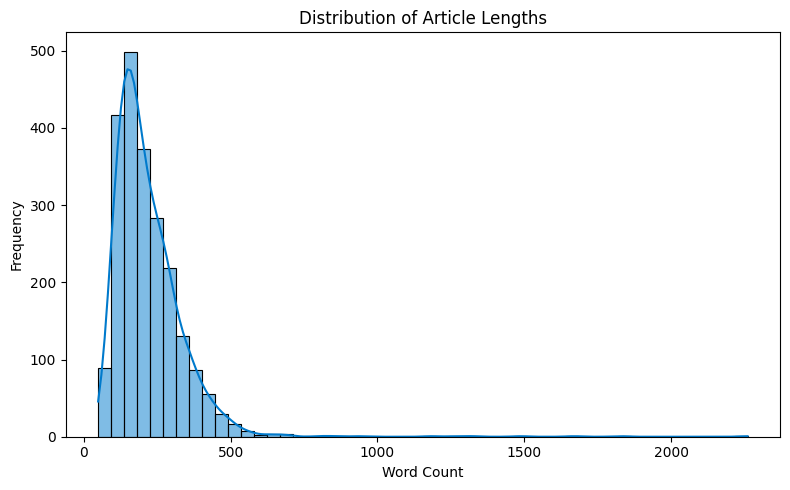

/tmp/ipython-input-2992107777.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


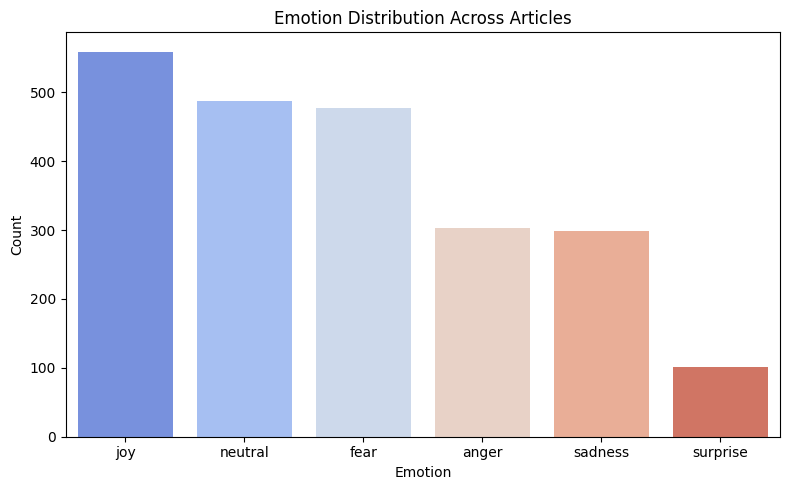

/tmp/ipython-input-2992107777.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


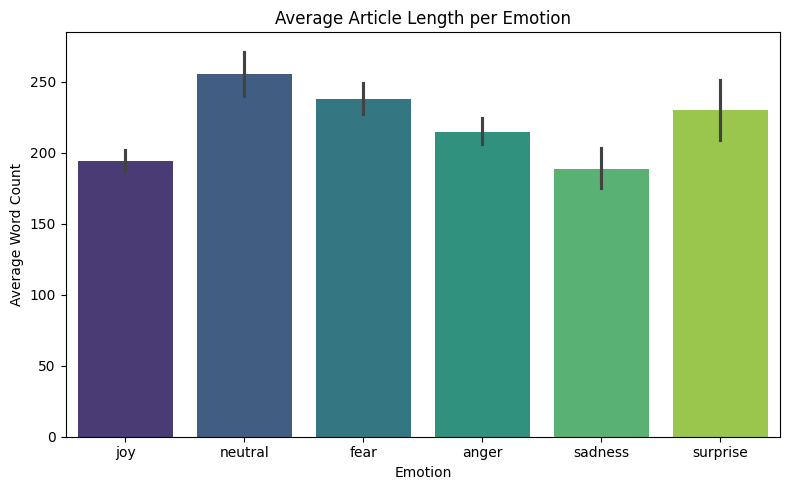

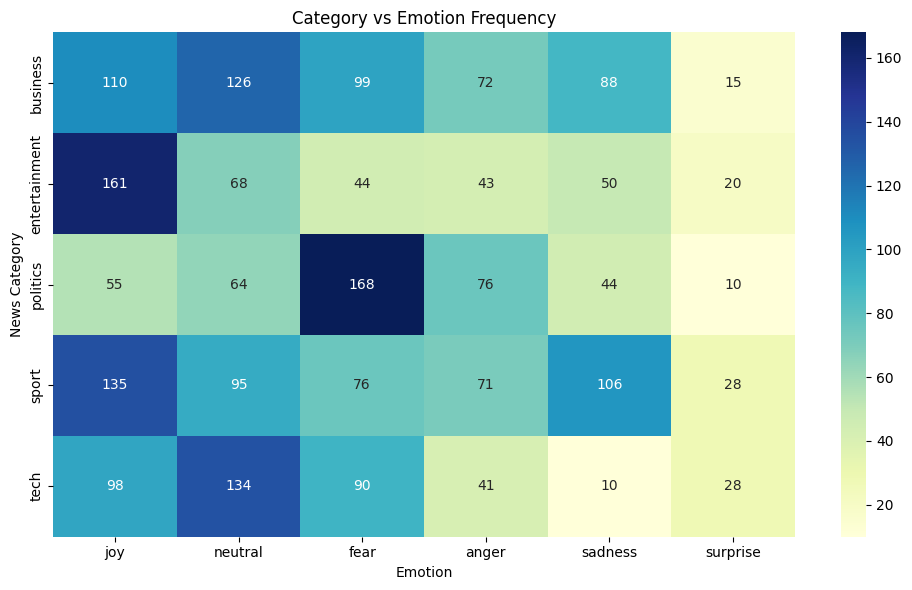

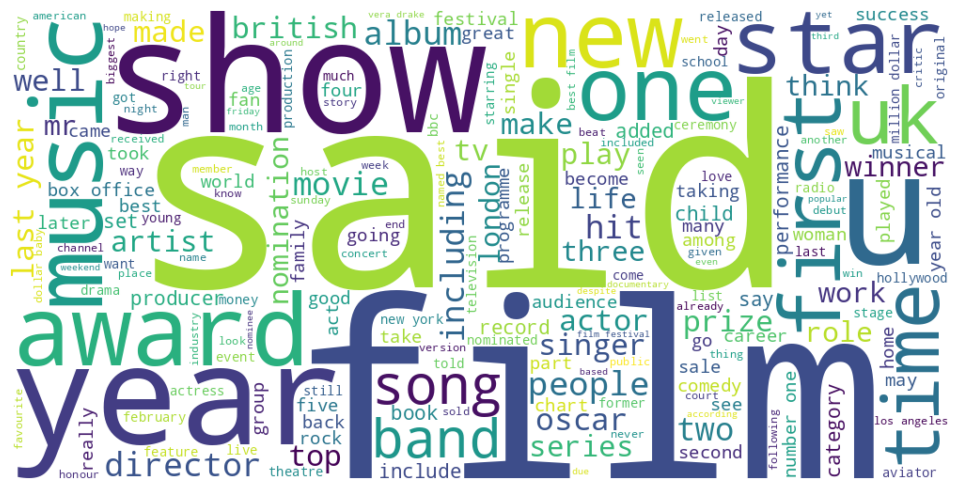

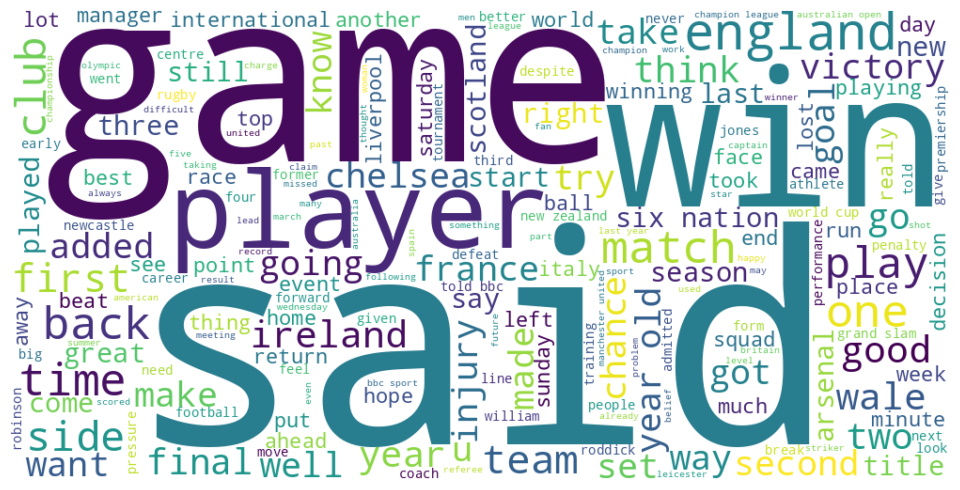

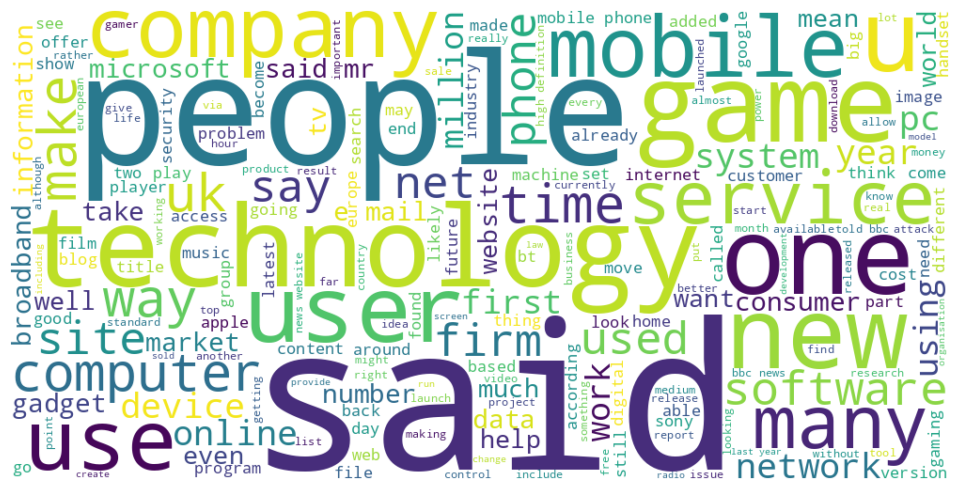

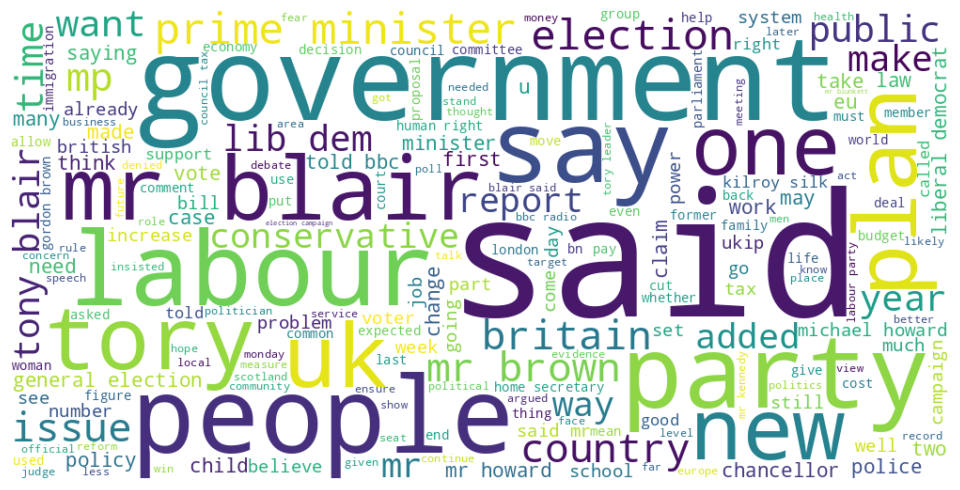

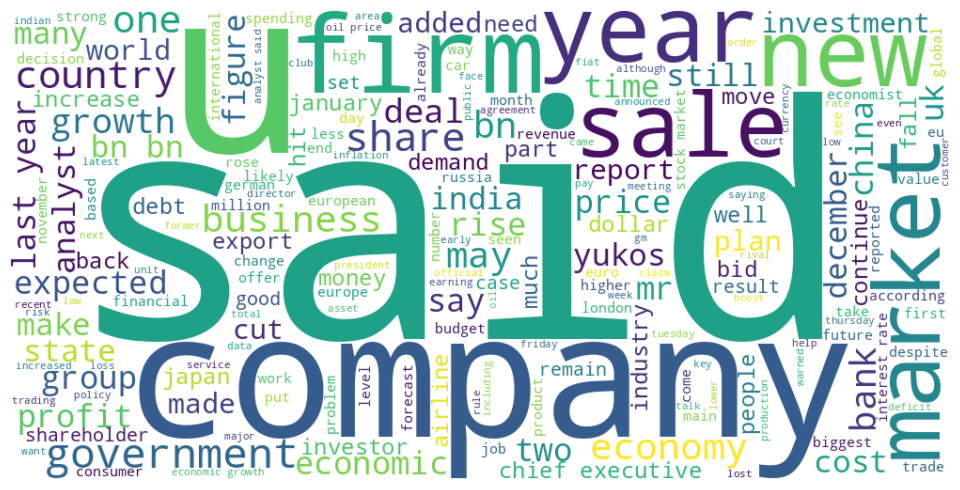

In [ ]:
# 📊 Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# LOAD DATA

df = pd.read_csv("/content/drive/MyDrive/BBC News Summary/news_with_emotions_refined.csv")

print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())

# ARTICLE LENGTH DISTRIBUTION

df["article_length"] = df["clean_article"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df["article_length"], bins=50, kde=True, color="#007acc")
plt.title("Distribution of Article Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# EMOTION DISTRIBUTION

plt.figure(figsize=(8,5))
sns.countplot(
    x="emotion",
    data=df,
    order=df["emotion"].value_counts().index,
    palette="coolwarm"
)
plt.title("Emotion Distribution Across Articles")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


#  AVERAGE ARTICLE LENGTH BY EMOTION
plt.figure(figsize=(8,5))
sns.barplot(
    x="emotion",
    y="article_length",
    data=df,
    order=df["emotion"].value_counts().index,
    palette="viridis"
)
plt.title("Average Article Length per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Average Word Count")
plt.tight_layout()
plt.show()

cross_tab = pd.crosstab(df["category"], df["emotion"])
cross_tab = cross_tab[df["emotion"].value_counts().index]

plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Category vs Emotion Frequency")
plt.xlabel("Emotion")
plt.ylabel("News Category")
plt.tight_layout()
plt.show()

# CATEGORY WORDCLOUDS (OPTIONAL)
for cat in df["category"].unique():
    text = " ".join(df[df["category"] == cat]["clean_article"].astype(str))
    wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from transformers import pipeline

emotion_df = pd.read_csv("/content/drive/MyDrive/BBC News Summary/news_with_emotions_refined.csv")
clean_df = pd.read_csv("/content/drive/MyDrive/BBC News Summary/cleaned_dataset.csv")

merged_df = pd.merge(
    emotion_df[['filename', 'category', 'clean_article', 'summary_ready', 'summary', 'emotion']],
    clean_df[['filename', 'summary_ready']],
    on="filename", how="inner"
)
merged_df.drop(columns=['summary_ready_y'], inplace=True, errors='ignore')
merged_df.rename(columns={'summary_ready_x': 'summary_ready'}, inplace=True)

merged_df.drop_duplicates(subset=["summary_ready", "category"], inplace=True)

# Emotion → Sentiment mapping

emotion_to_sentiment = {
    "joy": "positive", "surprise": "positive",
    "love": "positive", "gratitude": "positive",
    "anger": "negative", "sadness": "negative",
    "fear": "negative", "disgust": "negative",
    "neutral": "neutral", "calm": "neutral"
}
merged_df["sentiment"] = merged_df["emotion"].map(emotion_to_sentiment)

# Load summarizer (CPU)

summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)


available_sentiments = merged_df["sentiment"].dropna().unique().tolist()
available_categories = merged_df["category"].dropna().unique().tolist()

print("\n💬 Available Sentiments:", ", ".join(sorted(set(available_sentiments))))
user_sentiment = input("👉 Enter sentiment (positive / negative / neutral): ").strip().lower()

print("\n📰 Available Categories:", ", ".join(sorted(set(available_categories))))
user_category = input("👉 Enter category (business / sport / politics / tech / entertainment): ").strip().lower()

# Filter dataset

filtered_df = merged_df[
    (merged_df["sentiment"].str.lower() == user_sentiment)
    & (merged_df["category"].str.lower() == user_category)
]

if filtered_df.empty:
    print("\n⚠️ No matching articles found.")
else:
    print(f"\n✅ Found {len(filtered_df)} unique articles. Showing top 10 with human vs model summaries...\n")

    results = []

    for i, row in filtered_df.head(10).iterrows():

        text_to_summarize = " ".join(str(row["summary_ready"]).split()[:450])
        model_summary = summarizer(
            text_to_summarize,
            max_length=140,
            min_length=60,
            do_sample=True,
            top_p=0.9,
            temperature=0.8
        )[0]["summary_text"]

        results.append({
            "Category": row["category"].capitalize(),
            "Emotion": row["emotion"],
            "Sentiment": row["sentiment"].capitalize(),
            "Original_Human_Summary": row["summary"],
            "Model_Generated_Summary": model_summary
        })

        print("=" * 120)
        print(f"📰 CATEGORY: {row['category'].capitalize()}")
        print(f"🎭 Emotion: {row['emotion']} | 💬 Sentiment: {row['sentiment'].capitalize()}\n")
        print(f"👩‍💻 HUMAN-WRITTEN SUMMARY:\n{row['summary']}\n")
        print(f"🤖 MODEL-GENERATED SUMMARY:\n{model_summary}")
        print("=" * 120)
        print("\n")

    results_df = pd.DataFrame(results)
    save_path = "/content/drive/MyDrive/BBC News Summary/human_vs_model_summaries.csv"
    results_df.to_csv(save_path, index=False)
    print(f"💾 Saved comparison file at: {save_path}")

print("✅ Summarization Complete.")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu



💬 Available Sentiments: negative, neutral, positive
👉 Enter sentiment (positive / negative / neutral): positive

📰 Available Categories: business, entertainment, politics, sport, tech
👉 Enter category (business / sport / politics / tech / entertainment): tech

✅ Found 110 unique articles. Showing top 10 with human vs model summaries...

📰 CATEGORY: Tech
🎭 Emotion: joy | 💬 Sentiment: Positive

👩‍💻 HUMAN-WRITTEN SUMMARY:
The Agricultural Information Project for Farmers of the Chancay-Huaral Valley also provides vital links between local organisations in charge of water irrigation, enabling them to coordinate their actions.One of the key elements of the project is the Agricultural Information System, with its flagship huaral.org website.The information network also allows farmers to look beyond their own region, and share experiences with other colleagues from the rest of Peru and even around the world.A network of community computer centres, linked by wireless technology, is providing a

In [ ]:
# Evaluate Human vs Model Summaries using ROUGE & BLEU

!pip install rouge-score nltk --quiet

import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer


file_path = "/content/drive/MyDrive/BBC News Summary/human_vs_model_summaries.csv"
df = pd.read_csv(file_path)


rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
smooth = SmoothingFunction().method1


rouge1_scores, rougeL_scores, bleu_scores = [], [], []

for _, row in df.iterrows():
    ref = str(row["Original_Human_Summary"])
    gen = str(row["Model_Generated_Summary"])

    # ROUGE
    scores = rouge.score(ref, gen)
    rouge1_scores.append(scores['rouge1'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

    # BLEU
    ref_tokens = [ref.split()]
    gen_tokens = gen.split()
    bleu = sentence_bleu(ref_tokens, gen_tokens, smoothing_function=smooth)
    bleu_scores.append(bleu)

df["ROUGE-1"] = rouge1_scores
df["ROUGE-L"] = rougeL_scores
df["BLEU"] = bleu_scores

avg_r1, avg_rl, avg_bleu = df["ROUGE-1"].mean(), df["ROUGE-L"].mean(), df["BLEU"].mean()

print(f"\n📈 Average Scores across summaries:")
print(f"ROUGE-1: {avg_r1:.3f}")
print(f"ROUGE-L: {avg_rl:.3f}")
print(f"BLEU: {avg_bleu:.3f}")

save_path = "/content/drive/MyDrive/BBC News Summary/human_vs_model_summaries_scored.csv"
df.to_csv(save_path, index=False)
print(f"\n💾 Detailed scored file saved at: {save_path}")

df.head()


  Preparing metadata (setup.py) ... done

📈 Average Scores across summaries:
ROUGE-1: 0.427
ROUGE-L: 0.325
BLEU: 0.111

💾 Detailed scored file saved at: /content/drive/MyDrive/BBC News Summary/human_vs_model_summaries_scored.csv


,Category,Emotion,Sentiment,Original_Human_Summary,Model_Generated_Summary,ROUGE-1,ROUGE-L,BLEU
0,Entertainment,anger,Negative,"Sideways, a wine-tasting comedy starring Paul ...",Sideways is up for six Independent Spirit Awar...,0.427807,0.363636,0.121647
1,Entertainment,fear,Negative,The Ballymena-born actor said that the theatre...,Liam Neeson has held a dinner party in New Yor...,0.458150,0.317181,0.085530
2,Entertainment,fear,Negative,Ray has been nominated in six Oscar categories...,Ray has been nominated in six Oscar categories...,0.560510,0.484076,0.291480
3,Entertainment,sadness,Negative,"Davis, who was married to actress Ruby Dee, wa...",US actor Ossie Davis has been found dead at th...,0.451923,0.375000,0.117799
4,Entertainment,sadness,Negative,A Series of Unfortunate Events also stars Scot...,A Series of Unfortunate Events took $30.2m (Â£...,0.536585,0.373984,0.241061


In [ ]:
# Data Preprocessing
import pandas as pd

input_path = "/content/drive/MyDrive/BBC News Summary/news_with_emotions_refined.csv"
output_path = "/content/drive/MyDrive/BBC News Summary/news_with_sentiments.csv"

df = pd.read_csv(input_path)

if "sentiment" not in df.columns or df["sentiment"].isnull().all():
    print("🔄 Sentiment column missing — performing emotion → sentiment mapping...")
    emotion_to_sentiment = {
        "joy": "positive", "surprise": "positive",
        "love": "positive", "gratitude": "positive",
        "anger": "negative", "sadness": "negative",
        "fear": "negative", "disgust": "negative",
        "neutral": "neutral", "calm": "neutral"
    }
    df["sentiment"] = df["emotion"].map(emotion_to_sentiment)
else:
    print("✅ Sentiment column already exists — skipping mapping.")

df.to_csv(output_path, index=False)

print(f"\n📁 Processed dataset saved at: {output_path}")
print(f"✅ Total rows: {len(df)}")
print("🧠 Columns:", list(df.columns))
print("Unique sentiments:", df['sentiment'].unique())


🔄 Sentiment column missing — performing emotion → sentiment mapping...

📁 Processed dataset saved at: /content/drive/MyDrive/BBC News Summary/news_with_sentiments.csv
✅ Total rows: 2225
🧠 Columns: ['category', 'filename', 'article', 'summary', 'clean_article', 'summary_ready', 'emotion', 'sentiment']
Unique sentiments: ['negative' 'positive' 'neutral']


In [ ]:
# Gradio App
import gradio as gr
import pandas as pd
from transformers import pipeline

df = pd.read_csv("/content/drive/MyDrive/BBC News Summary/news_with_sentiments.csv")

summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)

def summarize_news(category, sentiment):
    filtered = df[
        (df["category"].str.lower() == category.lower()) &
        (df["sentiment"].str.lower() == sentiment.lower())
    ]
    if filtered.empty:
        return "⚠️ No matching articles found.", []

    summaries = []
    for _, row in filtered.head(10).iterrows():
        text = " ".join(str(row["summary_ready"]).split()[:450])
        model_summary = summarizer(
            text,
            max_length=140, min_length=60,
            do_sample=True, top_p=0.9, temperature=0.8
        )[0]["summary_text"]
        summaries.append({
            "Category": row["category"].capitalize(),
            "Sentiment": row["sentiment"].capitalize(),
            "Human Summary": row["summary"],
            "Model Summary": model_summary
        })

    formatted = ""
    for i, s in enumerate(summaries):
        formatted += f"""
<div style="background: linear-gradient(135deg, #1e40af 0%, #3b82f6 100%);
            padding: 20px; border-radius: 12px; margin-bottom: 20px;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <div style="background: white; padding: 15px; border-radius: 8px;">
        <h3 style="color: #1e40af; margin-top: 0;">📰 Article {i+1}: {s['Category']}
        <span style="background: {'#10b981' if s['Sentiment'] == 'Positive' else '#ef4444' if s['Sentiment'] == 'Negative' else '#6b7280'};
                     color: white; padding: 4px 12px; border-radius: 20px;
                     font-size: 0.85em; margin-left: 10px;">{s['Sentiment']}</span>
        </h3>
        <div style="margin-top: 15px;">
            <p style="color: #374151; line-height: 1.6; font-size: 1.05em;">{s['Model Summary']}</p>
        </div>
    </div>
</div>
"""
    return "✅ Top 10 AI-Generated News Summaries:", formatted

categories = sorted(df["category"].unique())
sentiments = sorted(df["sentiment"].dropna().unique())

custom_css = """
    .gradio-container { font-family: 'Inter', sans-serif !important; }
    .header-container {
        background: linear-gradient(135deg, #1e40af 0%, #3b82f6 100%);
        padding: 40px 20px; border-radius: 16px;
        text-align: center; margin-bottom: 30px;
        box-shadow: 0 10px 25px rgba(30, 64, 175, 0.3);
    }
    .header-title {
        color: white; font-size: 2.5em; font-weight: 700;
        text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
    }
    .header-subtitle { color: rgba(255, 255, 255, 0.9); font-size: 1.2em; margin-top: 10px; }
    .generate-btn {
        background: linear-gradient(135deg, #1e40af 0%, #3b82f6 100%) !important;
        border: none !important; font-size: 1.1em !important;
        padding: 12px 40px !important; font-weight: 600 !important;
        transition: transform 0.2s !important;
    }
    .generate-btn:hover {
        transform: translateY(-2px) !important;
        box-shadow: 0 6px 20px rgba(30, 64, 175, 0.4) !important;
    }
"""

with gr.Blocks(title="Read Top News As Per Your Mood", css=custom_css) as demo:
    gr.HTML("""
        <div class="header-container">
            <h1 class="header-title">📰 Read Top News As Per Your Mood</h1>
            <p class="header-subtitle">Discover AI-curated news summaries tailored to your preferences</p>
        </div>
    """)

    with gr.Row():
        with gr.Column(scale=1):
            category_in = gr.Dropdown(choices=categories, label="Select Category")
        with gr.Column(scale=1):
            sentiment_in = gr.Dropdown(choices=sentiments, label="Select Mood")

    generate_btn = gr.Button("Generate Top 10 News", elem_classes="generate-btn", size="lg")
    output_msg = gr.Textbox(label="Status", interactive=False)
    output_summaries = gr.HTML(label="Top News Summaries")

    generate_btn.click(summarize_news, inputs=[category_in, sentiment_in], outputs=[output_msg, output_summaries])

    gr.Markdown("""
        <div style="text-align: center; margin-top: 30px; color: #6b7280; font-size: 0.9em;">
            <p>💡 Powered by BART AI Model | Select a category and mood to get started</p>
        </div>
    """)

demo.launch(share=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5995760f0cf07f332e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
